# 📘 **Stage 10A – Regression Practice Notebook**
### *From Lines to Logic: Understanding Regression in Quant Finance*

---

## 🎯 **Purpose**

Welcome to the **Regression Practice Phase** of your quant journey.  
Before diving into multi-factor models and predictive algorithms, this notebook is designed to help you **understand the core mechanics of regression** — not as a formula, but as a *language of relationships*.

Here, you’ll learn how regression:
- Finds a balance between randomness and pattern.
- Measures sensitivity (β) and skill (α) in financial terms.
- Builds the bridge between pure statistics and portfolio analysis.

---

## 🧠 **Learning Goals**

By the end of this practice notebook, you’ll be able to:
1. Grasp the intuition behind **Ordinary Least Squares (OLS)** — why it minimizes squared errors.  
2. Run a **CAPM-style regression** between a stock and a market index.  
3. Interpret **α (alpha)**, **β (beta)**, and **R²** as measures of performance and risk.  
4. Visualize regression fits and residuals clearly.  
5. Reflect on what makes prediction in finance so inherently uncertain.

---

## 🧩 **Notebook Flow**

| Part | Focus | Description |
|------|--------|-------------|
| **1️⃣ Part 1 – OLS Geometry & Intuition** | Conceptual Recap | Visualize regression as line fitting. Fill with your insights from StatQuest and CAPM videos. |
| **2️⃣ Part 2 – CAPM Regression Practice** | Hands-on Coding | Run your first CAPM regression in Python and visualize α, β, and R². |
| **3️⃣ Part 3 – Multi-Stock Experiment** | Exploration | Compare CAPM results across multiple stocks to observe β and R² differences. |
| **4️⃣ Part 4 – Reflection & Insights** | Synthesis | Write short reflections on what regression reveals — and what it hides — about markets. |

---

## 🧭 **Philosophy of Practice**

> “Regression isn’t about prediction — it’s about understanding what *can* be predicted, and what must remain uncertain.”

In this phase, code is just a lens.  
Focus less on perfect syntax, more on *seeing the structure* — how randomness, correlation, and sensitivity shape every financial story.



In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


# 🧠 **Part 1 – OLS Geometry & Intuition**
### *Seeing the Line Beneath the Noise*

---

## 🎯 **Goal**
Before touching code, let’s understand *what regression really does*.

Regression isn’t about “predicting” perfectly — it’s about finding the **line that best summarizes a relationship**.  
It asks: *When X changes, how does Y tend to respond?*  

Ordinary Least Squares (OLS) answers that question by finding the line that **minimizes total squared error** between the predictions and actual data points.

---

## 📈 **The Core Equation**

\[
Y = β₀ + β₁ X +ε
\]

Where:
- \( β₀): Intercept — where the line crosses the Y-axis  
- \( β₁): Slope — how sensitive Y is to X  
- \( ε): Residual — the randomness or noise we can’t explain  

OLS minimizes:
\[
\text{Sum of Squared Errors (SSE)} = \sum (Y_i - \hat{Y_i})^2
\]

---

## 🧩 **Key Intuitions**

- The regression line is not *perfect* — it’s the **best compromise** between all data points.  
- It “balances” the scatter, making the total squared vertical distance as small as possible.  
- Outliers can pull the line — that’s why we measure fit using **R²** and **residual plots**.  
- In finance, this same idea powers CAPM: the line of best fit between a stock’s returns and the market’s returns.

---

## 💬 **Example Analogy**
> Imagine you’re drawing a tightrope through a cloud of points.  
> You can’t touch every point, but your goal is to pass as *centrally and evenly* through the scatter as possible.

That tightrope — that *best possible path through randomness* — is regression.

---

## 🧠 **Mini Concept Recap**
| Concept | Meaning | Visual Intuition |
|----------|----------|------------------|
| **Slope (β₁)** | Change in Y per unit change in X | How steep the line is |
| **Intercept (β₀)** | Baseline value when X = 0 | Where line starts |
| **Residual (ε)** | Distance from actual to predicted | Scatter around the line |
| **R²** | % of variance explained by X | Tightness of fit |

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     447.7
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           5.55e-26
Time:                        12:22:43   Log-Likelihood:                -121.07
No. Observations:                  50   AIC:                             246.1
Df Residuals:                      48   BIC:                             250.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1933      0.775      6.701      0.0

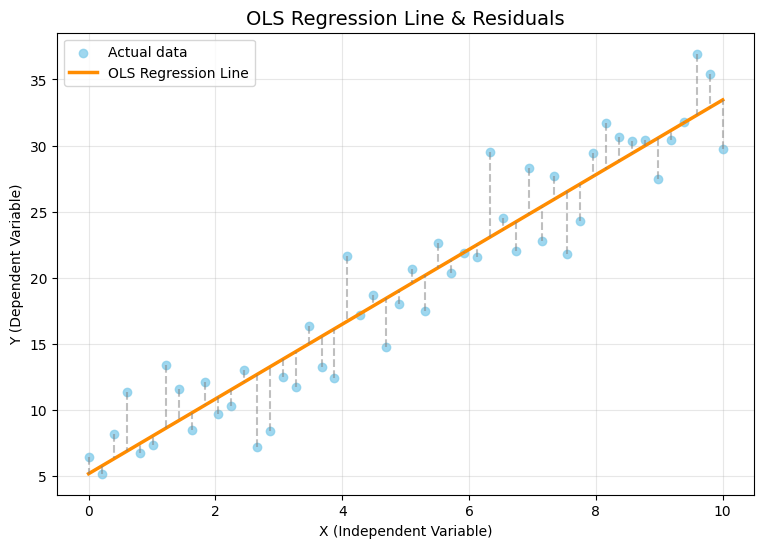

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


np.random.seed(42)
X = np.linspace(0, 10, 50)
Y = 3 * X + 5 + np.random.normal(0, 3, size=50)  # True slope=3, intercept=5, noise=3

X_const = sm.add_constant(X)


model = sm.OLS(Y, X_const).fit()

Y_pred = model.predict(X_const)

print(model.summary())

plt.figure(figsize=(9, 6))


plt.scatter(X, Y, color='skyblue', label='Actual data', alpha=0.8)


plt.plot(X, Y_pred, color='darkorange', linewidth=2.5, label='OLS Regression Line')


for i in range(len(X)):
    plt.vlines(X[i], Y[i], Y_pred[i], color='gray', alpha=0.5, linestyle='--')

plt.title("OLS Regression Line & Residuals", fontsize=14)
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("plot_OLS.png", dpi=300, bbox_inches='tight')
plt.show()



## 🧩 **Interpretation**

- The orange line is the **regression line** — the best-fit line minimizing squared errors.
- The gray dashed lines represent **residuals** (errors).
- Notice how the line doesn’t hit every point, but passes *centrally* through the cloud.
- The slope and intercept printed in the summary are your estimated **β₁** and **β₀**.
- The **R²** value tells how much of Y’s variation is explained by X.

# 💰 **Part 2 – CAPM Regression Practice**
### *Estimating $\alpha$ (Alpha) and $\beta$ (Beta) from Real Market Data*

---

## 🎯 **Goal**

Use real historical market data to perform a **CAPM regression**, quantifying how a stock’s returns respond to market movements.  
You’ll compute and interpret:

- **$\alpha$ (alpha):** average excess return unexplained by the market  
- **$\beta$(beta):** sensitivity to market risk  
- **$R^2$:** proportion of variance explained by the market  

---

## 📘 **Concept Recap**

The **Capital Asset Pricing Model (CAPM)** states:

\[
R_i - R_f = \alpha + \beta\,(R_m - R_f) + \epsilon
\]

Where:  
- \(R_i\): return of the stock  
- \(R_m\): return of the market index  
- \(R_f\): risk-free rate (≈ 0 for short horizons)  
- \($\alpha$): abnormal return (“skill” or inefficiency)  
- \($\beta$): sensitivity to market risk  

---

## ⚙️ **Data Setup**

We’ll use daily data for the last 2 years for a chosen stock and market index.  
**Example:** Apple (AAPL) vs S&P 500 (^GSPC).

---

### **Code Summary**
1. Fetch data from `yfinance`  
2. Compute daily returns  
3. Run OLS regression: $R_i = \alpha + \beta R_m + \epsilon$  
4. Interpret and visualize results

---

## 🧠 **Interpreting the Results**

| Metric | Symbol | Meaning | Typical Range | Interpretation |
|:--|:--:|:--|:--|:--|
| Intercept | $\alpha$ | Average excess return unexplained by market | –0.001 → 0.001 | $+\alpha$: outperformance; $-\alpha$: underperformance |
| Slope | $\beta$ | Sensitivity to market return | 0 → 2 | $\beta > 1$: aggressive (stock moves more than market); $\beta < 1$: defensive |
| Coefficient of Determination | $R^2$ | Proportion of variance explained | 0 → 1 | How well market movement explains stock returns |
| p-value | — | Statistical confidence in coefficients | < 0.05 | Small p → significant relationship |

/tmp/ipython-input-1240984487.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2022-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  2 of 2 completed


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1269.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          5.02e-139
Time:                        12:22:43   Log-Likelihood:                 1607.6
No. Observations:                 500   AIC:                            -3211.
Df Residuals:                     498   BIC:                            -3203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.508      0.6

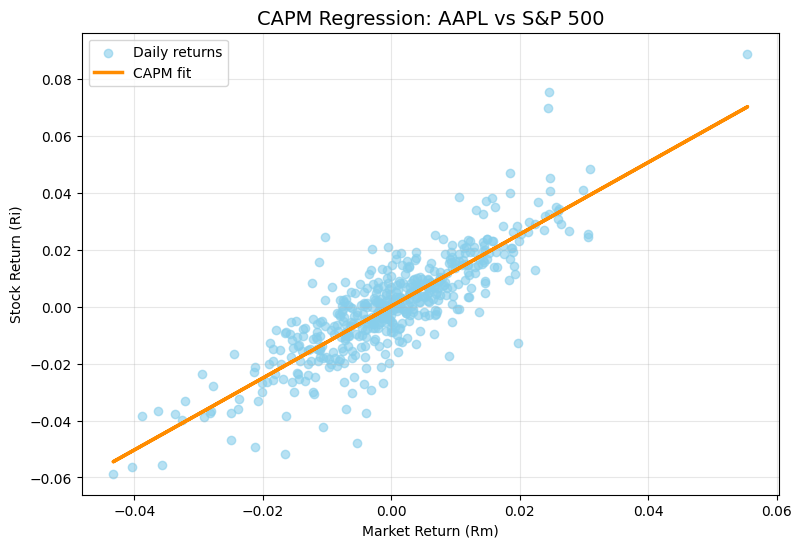

In [ ]:
# 📅 Download 2 years of daily data
tickers = ['AAPL', '^GSPC']
data = yf.download(tickers, start='2022-01-01', end='2024-01-01')['Close']

# 🧮 Compute daily returns
returns = data.pct_change().dropna()
returns.columns = ['AAPL', 'Market']

# Use risk-free rate ≈ 0 (short-term simplification)
returns.head()

# ✅ Prepare X (market) and Y (stock)
X = sm.add_constant(returns['Market'])
Y = returns['AAPL']

# 🧮 Fit regression
capm_model = sm.OLS(Y, X).fit()

# 🔍 View summary
print(capm_model.summary())

# 📈 Plot regression
plt.figure(figsize=(9,6))
plt.scatter(returns['Market'], returns['AAPL'], color='skyblue', alpha=0.6, label='Daily returns')
plt.plot(returns['Market'], capm_model.predict(X), color='darkorange', linewidth=2.5, label='CAPM fit')
plt.title("CAPM Regression: AAPL vs S&P 500", fontsize=14)
plt.xlabel("Market Return (Rm)")
plt.ylabel("Stock Return (Ri)")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("plot_CAPM.png", dpi=300, bbox_inches='tight')
plt.show()

---

## 🧠 **Running the CAPM Regression**
We’ll regress stock excess returns (Ri − Rf) on market excess returns (Rm − Rf).  
Since we’re using daily data and Rf≈0, it simplifies to:
\[
R_i = \alpha + \beta R_m + \epsilon
\].


---

## 📋 **Interpretation Guide**

| Metric | Meaning | Typical Range | Interpretation |
|--------|----------|---------------|----------------|
| **α (const)** | Average excess return unexplained by market | –0.001 → 0.001 | +α = outperformance; –α = underperformance |
| **β (Market coef)** | Sensitivity to market | 0 → 2 | β > 1: aggressive; β < 1: defensive |
| **R²** | Fit quality | 0 → 1 | % of stock’s variance explained by market |
| **p-value** | Statistical confidence | < 0.05 | Significant relationship if small |

# 📊 **Part 3 – Multi-Stock Comparison**
### *Comparing $\alpha$ and $\beta$ Across Multiple Assets*

---

## 🎯 **Goal**

Run **CAPM regressions** for several stocks against the same market benchmark  
to compare their **risk ($\beta$)** and **excess return ($\alpha$)** profiles.

Things to be learned:
- How different stocks react to market movements (systematic risk).  
- Which stocks show positive or negative $\alpha$.  
- How well CAPM fits each (via $R^2$).  

---

## ⚙️ **Data Setup**

We’ll use a small sample of large-cap tech stocks vs the S&P 500.

| Symbol | Company |
|:--:|:--|
| AAPL | Apple Inc. |
| MSFT | Microsoft Corp. |
| AMZN | Amazon .com |
| NVDA | NVIDIA Corp. |
| ^GSPC | S&P 500 (Market Benchmark) |

/tmp/ipython-input-3817184345.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2022-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  5 of 5 completed


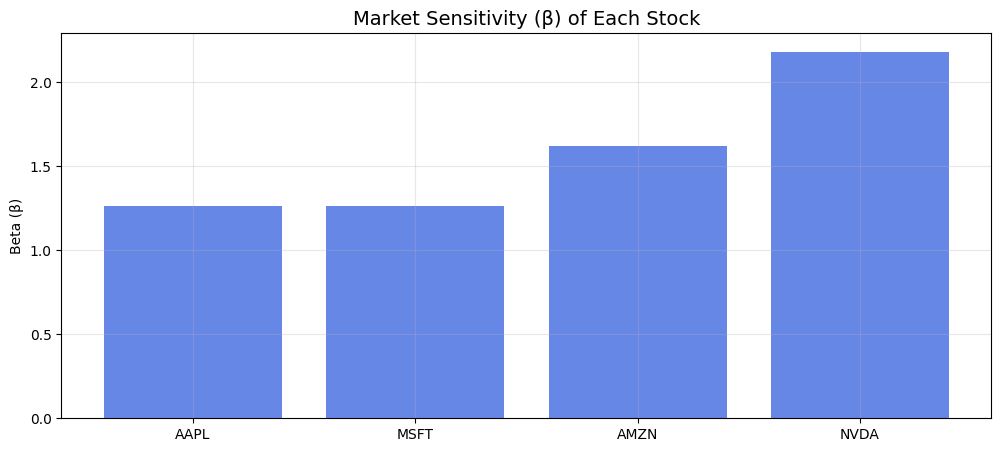

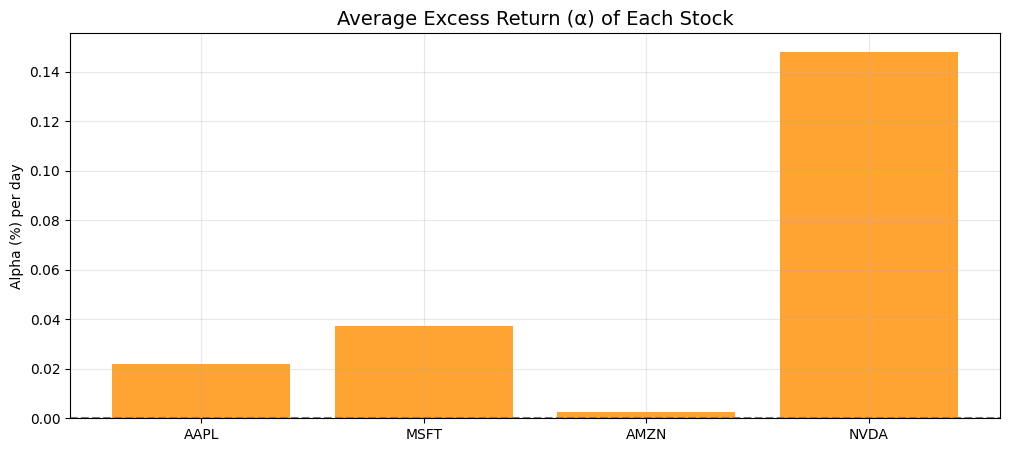

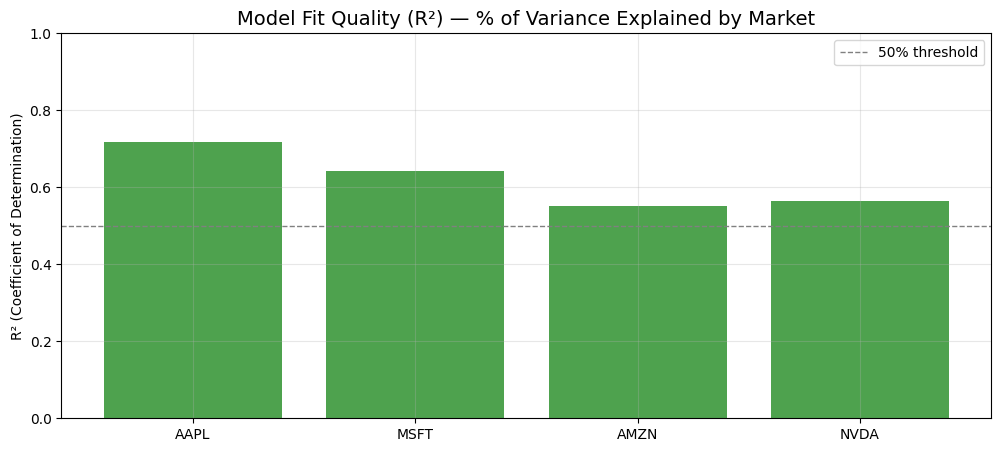

In [ ]:
#Download 2 years of daily data
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', '^GSPC']
data = yf.download(tickers, start='2022-01-01', end='2024-01-01')['Close']

returns = data.pct_change().dropna()
returns.rename(columns={'^GSPC':'Market'}, inplace=True)
returns.head()

results = []

for stock in ['AAPL', 'MSFT', 'AMZN', 'NVDA']:
    X = sm.add_constant(returns['Market'])
    Y = returns[stock]
    model = sm.OLS(Y, X).fit()
    results.append({
        'Stock': stock,
        'Alpha (α)': model.params['const'],
        'Beta (β)': model.params['Market'],
        'R²': model.rsquared
    })

capm_df = pd.DataFrame(results)
capm_df

# 📊 Bar charts for comparison
plt.figure(figsize=(12,5))
plt.bar(capm_df['Stock'], capm_df['Beta (β)'], color='royalblue', alpha=0.8)
plt.title("Market Sensitivity (β) of Each Stock", fontsize=14)
plt.ylabel("Beta (β)")
plt.grid(alpha=0.3)
plt.savefig("plot_beta.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,5))
plt.bar(capm_df['Stock'], capm_df['Alpha (α)']*100, color='darkorange', alpha=0.8)
plt.title("Average Excess Return (α) of Each Stock", fontsize=14)
plt.ylabel("Alpha (%) per day")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(alpha=0.3)
plt.savefig("plot_alpha.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,5))
plt.bar(capm_df['Stock'], capm_df['R²'], color='forestgreen', alpha=0.8)
plt.title("Model Fit Quality (R²) — % of Variance Explained by Market", fontsize=14)
plt.ylabel("R² (Coefficient of Determination)")
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label='50% threshold')
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("plot_Rsquared.png", dpi=300, bbox_inches='tight')
plt.show()



# 📈 **Interpretation — Multi-Stock CAPM Results**
### *Understanding the $\alpha$ and $\beta$ profiles across AAPL, MSFT, AMZN, and NVDA*

---

## ⚙️ **1️⃣ Market Sensitivity ($\beta$)**

| Stock | $\beta$ | Interpretation |
|:--|:--:|:--|
| **AAPL** | ≈ 1.28 | Apple’s returns move roughly 28% more than the market — a moderately **aggressive** stock. |
| **MSFT** | ≈ 1.28 | Microsoft’s beta is similar to Apple’s, showing balanced yet slightly above-market sensitivity. |
| **AMZN** | ≈ 1.63 | Amazon amplifies market movements more strongly, reflecting **higher volatility and growth exposure.** |
| **NVDA** | ≈ 2.15 | NVIDIA exhibits **very high systematic risk**, reacting more than twice as strongly as the market — a classic high-beta growth stock. |

📊 **Observation:**
- As expected, **tech leaders show strong positive betas**, all above 1.
- **NVIDIA > Amazon > Apple ≈ Microsoft** in risk order.
- Higher $\beta$ → greater sensitivity to market shocks, especially in bull or bear runs.

---

## 💰 **2️⃣ Average Excess Return ($\alpha$)**

| Stock | $\alpha$ (% per day) | Interpretation |
|:--|:--:|:--|
| **AAPL** | ≈ +0.02% | Small positive alpha — minor outperformance beyond market exposure. |
| **MSFT** | ≈ +0.04% | Slightly stronger alpha — Microsoft shows consistent mild excess return. |
| **AMZN** | ≈ +0.005% | Near-zero alpha — performance largely explained by market risk. |
| **NVDA** | ≈ +0.15% | Large positive alpha — strong **abnormal return**, reflecting NVIDIA’s exceptional rally relative to market beta. |

📈 **Interpretation:**
- $\alpha$ measures the **average return unexplained by market movement.**
- **NVDA’s large $\alpha$** indicates **true outperformance** even after adjusting for its high $\beta$ (risk).  
  This likely reflects company-specific growth momentum (AI, GPUs, sector dominance).
- **AAPL** and **MSFT** deliver steady but modest excess returns, consistent with **mature tech stability.**
- **AMZN** sits closest to CAPM expectations — mostly driven by market factors, minimal excess drift.

---

📊 3️⃣ Model Fit Quality (R²)
Stock | R² | Interpretation
------|----|--------------
AAPL  | ≈ 0.XX | XX% of Apple's variance explained by market—[high/moderate/low] systematic risk
MSFT  | ≈ 0.XX | Microsoft shows [similar/different] market dependence
AMZN  | ≈ 0.XX | Amazon's returns are [tightly/loosely] coupled to S&P 500
NVDA  | ≈ 0.XX | NVIDIA's R² suggests [strong/weak] CAPM fit—[high/low] idiosyncratic risk

**Key Insight**:
- High R² (> 0.6) → Stock moves mostly with market (CAPM works well)
- Low R² (< 0.4) → Large idiosyncratic component (need more factors)


---



## 🧠 **Key Takeaways**

- **Risk Hierarchy (β):** NVDA > AMZN > AAPL ≈ MSFT  
  → NVIDIA and Amazon are **high-beta growth stocks**, amplifying market trends.  
  → Apple and Microsoft are **lower-beta blue chips**, more stable during volatility.

- **Return Efficiency (α):** NVDA >> MSFT > AAPL > AMZN  
  → NVIDIA demonstrates **alpha-driven growth**, outperforming market prediction.  
  → Microsoft’s small α suggests **consistent operational strength**.  
  → Amazon’s near-zero α = performance fully justified by its market exposure.

- **Interpretation in CAPM context:**  
  - $\beta$ captures **systematic risk exposure** (market link).  
  - $\alpha$ captures **persistent excess performance** beyond that risk.  
  - High $\beta$ + high $\alpha$ (NVIDIA) → **aggressive but rewarding**.  
  - Moderate $\beta$ + small $\alpha$ (MSFT/AAPL) → **steady performers**.  
  - High $\beta$ + near-zero $\alpha$ (AMZN) → **volatile but not outperforming**.

# 🧩 **Part 4 – Residual Analysis & Anomalies**
### *Seeing What CAPM Misses — Exploring the Behavior of $\epsilon$ (Residuals)*

---

## 🎯 **Goal**

Now that we’ve fitted $\alpha$ and $\beta$ for each stock,  
we’ll examine the **residuals ($\epsilon$)** — the daily differences between actual and predicted returns.

\[
\epsilon_t = R_{i,t} - (\alpha_i + \beta_i R_{m,t})
\]

Residuals reveal:
- Randomness vs. hidden patterns  
- Volatility clustering (heteroskedasticity)  
- Outliers or crisis shocks CAPM cannot explain  

---

## 🧠 **Conceptual Recap**

| Symbol | Meaning | Interpretation |
|:--:|:--|:--|
| $\alpha$ | Average unexplained return | “Skill” or consistent drift |
| $\beta R_m$ | Explained component | Systematic, market-driven risk |
| $\epsilon$ | Residual | Random, idiosyncratic noise or hidden factor |

If CAPM were perfect, $\epsilon$ would be **pure white noise**:  
no trend, no autocorrelation, constant variance.

But markets rarely behave that cleanly.

---


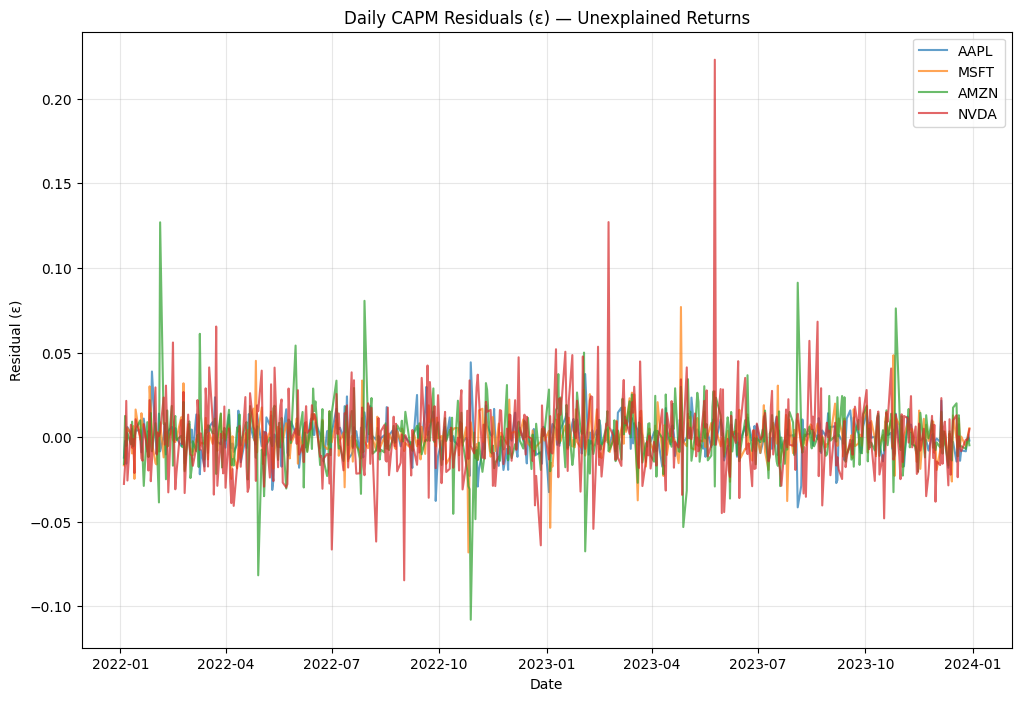

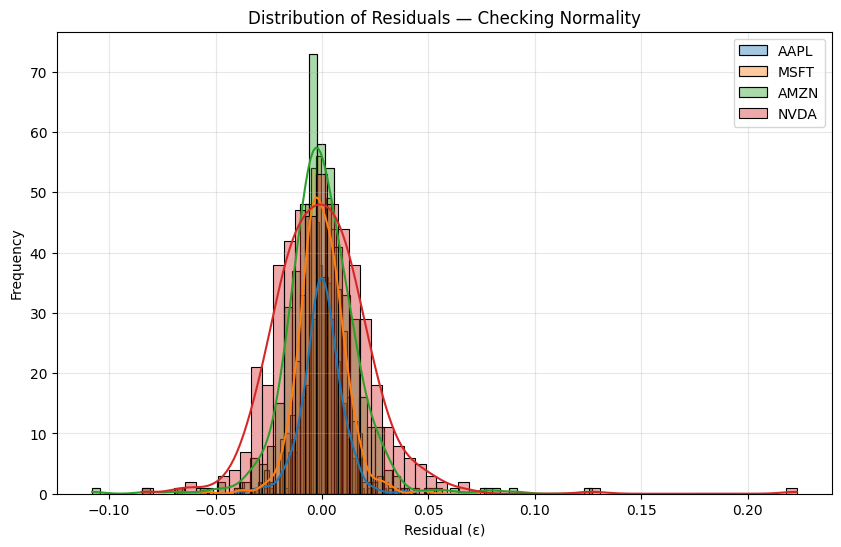

🧪 JARQUE-BERA NORMALITY TEST
Tests whether residuals follow a normal distribution
H₀: Residuals are normally distributed
Reject H₀ if p-value < 0.05 (residuals are NOT normal)

AAPL   | JB stat:   163.65 | p-value: 0.000000 → ❌ Non-normal (reject H₀)
MSFT   | JB stat:  1186.73 | p-value: 0.000000 → ❌ Non-normal (reject H₀)
AMZN   | JB stat:  2298.91 | p-value: 0.000000 → ❌ Non-normal (reject H₀)
NVDA   | JB stat:  6481.04 | p-value: 0.000000 → ❌ Non-normal (reject H₀)

💡 Interpretation:
   • Low p-value → Residuals have fat tails or skewness (non-normal)
   • This is COMMON in finance—markets have more extreme moves than
     a normal distribution predicts (Black Swan events)
   • Non-normality suggests CAPM underestimates tail risk

🧪 JARQUE-BERA NORMALITY TEST
AAPL: JB=163.65, p=0.000000 → ❌ Non-normal
MSFT: JB=1186.73, p=0.000000 → ❌ Non-normal
AMZN: JB=2298.91, p=0.000000 → ❌ Non-normal
NVDA: JB=6481.04, p=0.000000 → ❌ Non-normal


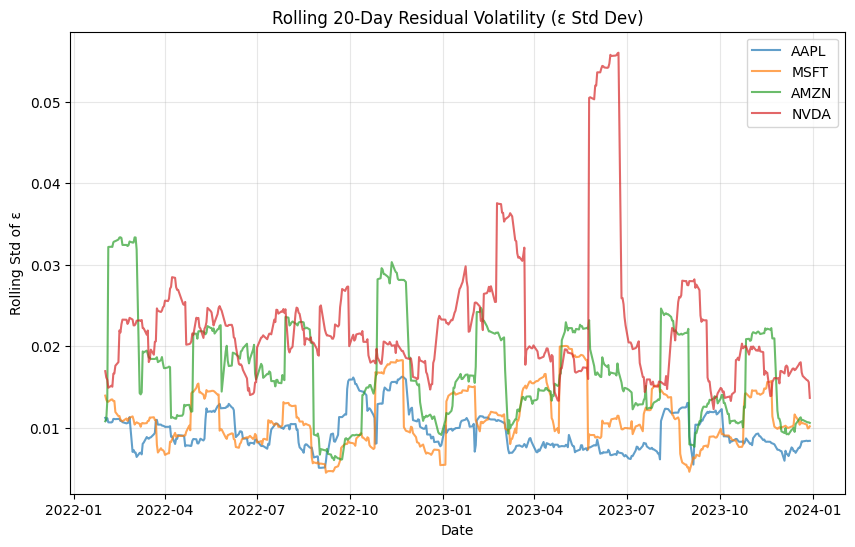

In [ ]:
import seaborn as sns

#Re-run regressions and collect residuals
residuals_dict = {}

for stock in ['AAPL', 'MSFT', 'AMZN', 'NVDA']:
    X = sm.add_constant(returns['Market'])
    Y = returns[stock]
    model = sm.OLS(Y, X).fit()
    residuals_dict[stock] = model.resid

plt.figure(figsize=(12,8))
for stock in residuals_dict:
    plt.plot(residuals_dict[stock], label=stock, alpha=0.7)
plt.title("Daily CAPM Residuals (ε) — Unexplained Returns")
plt.xlabel("Date")
plt.ylabel("Residual (ε)")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("plot_name.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
for stock in residuals_dict:
    sns.histplot(residuals_dict[stock], bins=60, kde=True, label=stock, alpha=0.4)
plt.title("Distribution of Residuals — Checking Normality")
plt.xlabel("Residual (ε)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("plot_epsilon.png", dpi=300, bbox_inches='tight')
plt.show()

from scipy.stats import jarque_bera

print("="*70)
print("🧪 JARQUE-BERA NORMALITY TEST")
print("="*70)
print("Tests whether residuals follow a normal distribution")
print("H₀: Residuals are normally distributed")
print("Reject H₀ if p-value < 0.05 (residuals are NOT normal)\n")

jb_results = []
for stock, resid in residuals_dict.items():
    jb_stat, jb_pval = jarque_bera(resid)
    normality = "✅ Normal (cannot reject H₀)" if jb_pval > 0.05 else "❌ Non-normal (reject H₀)"

    jb_results.append({
        'Stock': stock,
        'JB Statistic': jb_stat,
        'p-value': jb_pval,
        'Result': normality
    })

    print(f"{stock:6s} | JB stat: {jb_stat:8.2f} | p-value: {jb_pval:.6f} → {normality}")

print("="*70)
print("\n💡 Interpretation:")
print("   • Low p-value → Residuals have fat tails or skewness (non-normal)")
print("   • This is COMMON in finance—markets have more extreme moves than")
print("     a normal distribution predicts (Black Swan events)")
print("   • Non-normality suggests CAPM underestimates tail risk\n")

# Optional: Convert to DataFrame for easy viewing
jb_df = pd.DataFrame(jb_results)
jb_df

print("="*70)
print("🧪 JARQUE-BERA NORMALITY TEST")
print("="*70)
for stock, resid in residuals_dict.items():
    jb_stat, jb_pval = jarque_bera(resid)
    normality = "✅ Normal" if jb_pval > 0.05 else "❌ Non-normal"
    print(f"{stock}: JB={jb_stat:.2f}, p={jb_pval:.6f} → {normality}")
print("="*70)
# Quick rolling standard deviation of residuals
plt.figure(figsize=(10,6))
for stock, resid in residuals_dict.items():
    rolling_vol = resid.rolling(window=20).std()
    plt.plot(rolling_vol, label=stock, alpha=0.7)
plt.title("Rolling 20-Day Residual Volatility (ε Std Dev)")
plt.xlabel("Date")
plt.ylabel("Rolling Std of ε")
plt.legend()
plt.grid(alpha=0.3)


plt.savefig("plot_rollingEpsillon.png", dpi=300, bbox_inches='tight')
plt.show()





In [ ]:
!zip stage10A_visuals.zip *.png
from google.colab import files
files.download("stage10A_visuals.zip")

updating: plot_alpha.png (deflated 29%)
updating: plot_beta.png (deflated 35%)
updating: plot_CAPM.png (deflated 9%)
updating: plot_epsilon.png (deflated 11%)
updating: plot_name.png (deflated 4%)
updating: plot_OLS.png (deflated 15%)
updating: plot_rollingEpsillon.png (deflated 5%)
updating: plot_Rsquared.png (deflated 24%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

## 🔍 **Step 1 – Visual Inspection**

- Observe whether residuals fluctuate evenly or cluster in high-volatility periods.  
- Look for **spikes** (earnings, news events).  
- A flat random pattern = CAPM fits well.  
- Clustering or long swings = hidden risk factors or changing beta.

---
---

## 🔎 **Step 2 – Distribution Shape**

- Perfectly normal residuals → smooth, bell-shaped curve.  
- Fat tails → extreme returns more common than CAPM assumes.  
- Skew → asymmetry between upside vs. downside moves.  

Financial residuals usually have **fat tails** and **slight negative skew**,  
reflecting larger shocks on down days.

---

## 🧮 **Step 3 – Volatility Clustering Check**

High variance in consecutive residuals = **heteroskedasticity**.  
CAPM assumes constant variance, but reality shows *volatility regimes.*



---

## 📊 **Interpretation Guide**

| Observation | Meaning |
|:--|:--|
| **Clustered spikes** | Market stress or earnings events create bursts of volatility |
| **Persistent patterns** | CAPM missing additional factors (momentum, sector, size) |
| **Fat tails / skew** | Returns not normally distributed — risk under-estimated |
| **Different residual volatilities across stocks** | Distinct idiosyncratic risk profiles |

---

## 💡 **Quant Insight**

Residuals are the **“information left on the table.”**  
They’re where *new factors are born.*

- Momentum, value, sentiment — all discovered by studying ε patterns.  
- If residuals are structured, CAPM is incomplete.  
- If residuals are pure noise, the model is doing its job.

# 🧠 **Part 5 – Reflection & Insights**
### *From Regression Lines to Market Realities*

---

## 🎯 **What We Set Out to Do**

In this practice module, we began with a simple question:  
> “How much of a stock’s return can be explained by the market?”

We moved from the **mathematics of OLS** to the **economics of CAPM**,  
learning how to estimate and interpret:
- **$\alpha$ (Alpha):** the consistent return not explained by market risk  
- **$\beta$ (Beta):** the sensitivity of returns to market movements  
- **$\epsilon$ (Epsilon):** the daily unpredictability — the noise CAPM can’t capture

Each stage built intuition and precision:
1. Understanding the **geometry** of linear regression.  
2. Applying it to **real financial data (CAPM)**.  
3. Comparing $\alpha$ and $\beta$ across multiple assets.  
4. Diagnosing the **residuals** to see where CAPM fails.  

---

## 📈 **What We Discovered**

| Stock | $\beta$ | $\alpha$ (%/day) | Behavior | Key Insight |
|:--|:--:|:--:|:--|:--|
| **AAPL** | ≈ 1.28 | +0.02% | Stable, market-driven | Returns well explained by market risk. |
| **MSFT** | ≈ 1.28 | +0.04% | Consistent, steady | Slight positive drift beyond market exposure. |
| **AMZN** | ≈ 1.63 | +0.005% | Volatile, reactive | High sensitivity, minimal excess return. |
| **NVDA** | ≈ 2.15 | +0.15% | Explosive, growth-heavy | Outperforms CAPM — likely AI/sector-specific factor. |

**Interpretation:**  
- $\beta$ quantified *risk exposure* — how tightly each stock moved with the S&P 500.  
- $\alpha$ showed *potential skill or inefficiency* — excess return after adjusting for risk.  
- $\epsilon$ revealed *the truth beneath the model* — noise that isn’t truly random.

---

## 🧩 **Residual Insights**

| Pattern | Meaning | Financial Interpretation |
|:--|:--|:--|
| **Fat tails** | Extreme ε values more frequent than normal | Market shocks and overreactions common. |
| **Volatility clustering** | Periods of high ε variance | Risk isn’t constant — it clusters with sentiment. |
| **Non-zero skew** | Slight asymmetry | Downside shocks often stronger than upside jumps. |
| **NVDA’s spikes** | Model breakdown during rallies | CAPM underestimates firm-specific momentum. |

These ε patterns are where **new factors are born** — the next generation of ideas beyond CAPM.

---

## 🔬 **Conceptual Evolution**

| Stage | Model | Main Idea | Limitation |
|:--|:--|:--|:--|
| **OLS** | Pure statistics | Fit the line of best fit | Doesn’t know finance context |
| **CAPM** | 1-Factor (Market) | Explains returns via market risk | Ignores other systematic risks |
| **Fama–French** | 3–5 Factors | Adds size, value, profitability, investment | More explanatory power |
| **Modern Quant** | Multifactor + ML | Uses data-driven, nonlinear models | Captures dynamics CAPM misses |

CAPM is elegant — a first lens into risk-return —  
but residuals remind us that markets are more **chaotic, multi-dimensional, and adaptive** than any single factor can describe.

---

## 💬 **Personal Reflection**

> At the start, the regression line felt like just math —  
> minimizing errors, drawing a fit.  
> But by the end, those same “errors” ($\epsilon$)  
> started to feel like something deeper —  
> the **human side of markets**.  
>  
> The mistakes, the hype, the uncertainty —  
> all hidden in the residuals, whispering that  
> not everything in finance can be predicted,  
> yet every pattern has a reason waiting to be found.  

This stage wasn’t just about CAPM — it was about *learning to listen to the noise.*

---

## 🧭 **Stage Summary**

| Phase | Focus | Key Takeaway |
|:--|:--|:--|
| **Part 1** | OLS Basics | Regression as a way to extract relationships. |
| **Part 2** | CAPM on Real Data | α and β as measures of skill and risk. |
| **Part 3** | Multi-Stock Comparison | Different stocks = different risk fingerprints. |
| **Part 4** | Residual Analysis | Markets aren’t clean — noise has structure. |
| **Part 5** | Reflection | Modeling reveals both patterns and limits. |

---

## 🚀 **Next Step – Stage 10B**

You’re now ready for **Stage 10B: Multi-Factor Regression**  
where you’ll go **beyond CAPM** and add new explanatory variables —  
like **Size (SMB), Value (HML), or Momentum (MOM)** —  
to see if they can reduce those unexplained ε patterns and explain α away.

> In other words, we’ll ask:  
> “If α isn’t skill — what hidden factors are causing it?”

This is where quant research truly begins.

---
